In [3]:
def calculate_mean_std(df_names, dfs):
    perf_train, perf_fair = [], []

    for df_name, df in zip(df_names, dfs):
        df_train = df[df['data'] == 'train_cont_ord_cat'].drop(columns=['data'])
        df_fair = df[df['data'] == 'fair_cont_ord_cat'].drop(columns=['data'])
        
        df_train_mean = df_train.mean()
        df_train_std = df_train.std()
        #df_train_median = df_train.median()
        df_train_mean['dataset'] = df_name
        df_train_std['dataset'] = df_name
        #df_train_median['dataset'] = df_name
        df_train_mean['type'] = 'mean'
        #df_train_median['type'] = 'median'
        df_train_std['type'] = 'std'
        perf_train.append(df_train_mean.to_frame().T)
        #perf_train.append(df_train_median.to_frame().T)
        perf_train.append(df_train_std.to_frame().T)
        
        df_fair_mean = df_fair.mean()
        #df_fair_median = df_fair.median()
        df_fair_std = df_fair.std()
        df_fair_mean['dataset'] = df_name
        #df_fair_median['dataset'] = df_name
        df_fair_std['dataset'] = df_name
        df_fair_mean['type'] = 'mean'
        #df_fair_median['type'] = 'median'
        df_fair_std['type'] = 'std'
        perf_fair.append(df_fair_mean.to_frame().T)
        #perf_fair.append(df_fair_median.to_frame().T)
        perf_fair.append(df_fair_std.to_frame().T)
    
    perf_train = pd.concat(perf_train).reset_index(drop=True)
    perf_fair = pd.concat(perf_fair).reset_index(drop=True)
    return perf_train, perf_fair

In [4]:
def aggregate_runs(dfs):
    df = pd.concat(dfs).reset_index(drop=True)
    df.drop(columns=['iteration'], inplace=True)
    df_num_cols = [c for c in df.columns if c not in ['classifier', 'algorithm']]
    df.loc[:, df_num_cols] = df.loc[:, df_num_cols].abs()
    df = df.groupby(['classifier', 'algorithm']).agg(['mean', 'std'])
    return df

In [5]:
def print_to_latex(dfs):
    df = pd.concat(dfs).reset_index(drop=True)
    df.drop(columns=['iteration'], inplace=True)
    df_num_cols = [c for c in df.columns if c not in ['classifier', 'algorithm']]
    #df.loc[:, df_num_cols] = df.loc[:, df_num_cols].abs()
    df = df.groupby(['classifier', 'algorithm']).agg(['mean', 'std'])
    print(df.to_latex(index=True))

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

def aggregate_runs_no_mean(dfs, y):
    df = pd.concat(dfs).reset_index(drop=True)
    df_num_cols = [c for c in df.columns if c not in ['classifier', 'algorithm']]
    df.loc[:, df_num_cols] = df.loc[:, df_num_cols].abs()
    g = sns.FacetGrid(df, col="classifier")
    g.map_dataframe(sns.lineplot, x='iteration', y=y, hue='algorithm', errorbar=None)
    g.add_legend()
    plt.show()

# Cont ord cat

In [82]:
import os
import pandas as pd

dfs_fairness = []
dfs_performance = []
dataset_names = ['heart_disease']
classifier_names = ['decision_tree', 'mlp', 'logistic_regression']
algorithm_names = ['fos', 'hfos', 'fawos', 'fair_rbo',]# 'fawos_hybrid']
folder_names = ['2024-06-07', '2024-06-07', '2024-06-07', '2024-06-07']

for dataset_name in dataset_names:
    df_data_fair = []
    df_data_perf = []
    for classifier_name in classifier_names:
        for folder_name, algorithm_name in zip(folder_names, algorithm_names):
            for i in range(0, 10):
                if os.path.exists(os.path.join('../results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'fairness_{i}.csv')):
                    fair_path = os.path.join('../results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'fairness_{i}.csv')
                    perf_path = os.path.join('../results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'performance_{i}.csv')
                    df_fair = pd.read_csv(fair_path)
                    df_performance = pd.read_csv(perf_path)
                    df_fair['classifier'] = [classifier_name] * len(df_fair)
                    df_fair['algorithm'] = [algorithm_name if 'fair' in x else '-' for x in df_fair['data']]
                    df_fair['iteration'] = [i] * len(df_fair)
                    # df_fair.drop(columns=['data', 'average_odds', 'average_absolute_odds'], inplace=True)
                    df_fair.drop(columns=['data'], inplace=True)
                    df_performance['classifier'] = [classifier_name] * len(df_performance)
                    df_performance['algorithm'] = [algorithm_name if 'fair' in x else '-' for x in df_performance['data']]
                    df_performance['iteration'] = [i] * len(df_performance)
                    df_performance.drop(columns=['data'], inplace=True)
                    df_data_fair.append(df_fair)
                    df_data_perf.append(df_performance)
    dfs_fairness.append(df_data_fair)
    dfs_performance.append(df_data_perf)
                

In [83]:
for dataset_name, dfs in zip(dataset_names, dfs_fairness):
    df = aggregate_runs(dfs)
    print(dataset_name)
    display(df)
    print('----------------------------------------------------------------')

heart_disease


statistical_parity            accuracy  \
                                            mean       std      mean   
classifier          algorithm                                          
decision_tree       -                   0.320317  0.140104  0.152063   
                    fair_rbo            0.141825  0.135932  0.126587   
                    fawos               0.203413  0.117275  0.122143   
                    fos                 0.302619  0.178465  0.156587   
                    hfos                0.158968  0.144312  0.138810   
logistic_regression -                   0.361190  0.138089  0.106587   
                    fair_rbo            0.223968  0.136047  0.079365   
                    fawos               0.236429  0.162806  0.113571   
                    fos                 0.353016  0.140535  0.121587   
                    hfos                0.248730  0.148477  0.093651   
mlp                 -                   0.184444  0.182727  0.121587   
                    fair_rbo            0.184841  0.131357  0.130714   
                    fawos               0.141349  0.104746  0.201349   
                    fos                 0.246349  0.142144  0.121111   
                    hfos                0.188571  0.168136  0.142063   

                                        equal_opportunity            \
                                    std              mean       std   
classifier          algorithm                                         
decision_tree       -          0.105089          0.247222  0.098343   
                    fair_rbo   0.073125          0.158135  0.116056   
                    fawos      0.078074          0.104762  0.110022   
                    fos        0.118737          0.239087  0.156988   
                    hfos       0.081782          0.185714  0.128093   
logistic_regression -          0.097622          0.217063  0.104056   
                    fair_rbo   0.104975          0.125595  0.117263   
                    fawos      0.096681          0.092063  0.115872   
                    fos        0.098555          0.229563  0.160266   
                    hfos       0.098581          0.150595  0.067112   
mlp                 -          0.115318          0.160119  0.123182   
                    fair_rbo   0.106206          0.208929  0.084138   
                    fawos      0.151097          0.017460  0.038483   
                    fos        0.123750          0.206944  0.159506   
                    hfos       0.101154          0.258730  0.097000   

                              average_odds           average_absolute_odds  \
                                      mean       std                  mean   
classifier          algorithm                                                
decision_tree       -             0.181512  0.175289              0.303914   
                    fair_rbo      0.172736  0.092499              0.224522   
                    fawos         0.139683  0.116424              0.190260   
                    fos           0.187762  0.138198              0.279392   
                    hfos          0.129095  0.085398              0.197024   
logistic_regression -             0.201461  0.153137              0.258532   
                    fair_rbo      0.190052  0.098925              0.215449   
                    fawos         0.187193  0.122292              0.198304   
                    fos           0.164331  0.141429              0.219706   
                    hfos          0.164529  0.099203              0.205601   
mlp                 -             0.202859  0.133561              0.253166   
                    fair_rbo      0.188808  0.081675              0.237419   
                    fawos         0.199260  0.122286              0.199260   
                    fos           0.128400  0.079789              0.184533   
                    hfos          0.218506  0.110384              0.264971   

                                        disparate

----------------------------------------------------------------


In [84]:
for dataset_name, dfs in zip(dataset_names, dfs_fairness):
    print(dataset_name)
    print_to_latex(dfs)
    print('----------------------------------------------------------------')

heart_disease
\begin{tabular}{llrrrrrrrrrrrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{statistical_parity} & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{equal_opportunity} & \multicolumn{2}{r}{average_odds} & \multicolumn{2}{r}{average_absolute_odds} & \multicolumn{2}{r}{disparate_impact} & \multicolumn{2}{r}{adapted_disparate_impact} & \multicolumn{2}{r}{gmean} \\
 &  & mean & std & mean & std & mean & std & mean & std & mean & std & mean & std & mean & std & mean & std \\
classifier & algorithm &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{decision_tree} & - & 0.320317 & 0.140104 & 0.075714 & 0.169942 & -0.161508 & 0.213550 & 0.173178 & 0.183733 & 0.303914 & 0.100392 & 0.607022 & 0.134482 & 0.607022 & 0.134482 & -0.082532 & 0.321253 \\
 & fair_rbo & 0.111825 & 0.164111 & -0.020079 & 0.150679 & 0.064087 & 0.191548 & -0.044165 & 0.198852 & 0.224522 & 0.080496 & 0.878214 & 0.259081 & 0.794881 & 0.146361 & -0.043268 & 0.185059 \\
 & fawos & 0.203413 & 

In [85]:
for dataset_name, dfs in zip(dataset_names, dfs_performance):
    df = aggregate_runs(dfs)
    print(dataset_name)
    display(df)
    print('----------------------------------------------------------------')

heart_disease


accuracy           balanced_accuracy            \
                                   mean       std              mean       std   
classifier          algorithm                                                   
decision_tree       -          0.774713  0.028275          0.770143  0.027067   
                    fair_rbo   0.764253  0.074622          0.761561  0.071228   
                    fawos      0.757356  0.057234          0.743063  0.061936   
                    fos        0.760805  0.066403          0.762540  0.062315   
                    hfos       0.774368  0.084978          0.770497  0.083357   
logistic_regression -          0.841609  0.059065          0.837920  0.060102   
                    fair_rbo   0.798161  0.058439          0.793883  0.055091   
                    fawos      0.831839  0.043936          0.821703  0.042934   
                    fos        0.811609  0.081636          0.815059  0.080579   
                    hfos       0.814943  0.075854          0.812132  0.076240   
mlp                 -          0.784598  0.080181          0.777563  0.081708   
                    fair_rbo   0.781264  0.056775          0.777484  0.057570   
                    fawos      0.741034  0.074629          0.721738  0.080533   
                    fos        0.751149  0.095212          0.760123  0.090706   
                    hfos       0.801494  0.055191          0.798568  0.054123   

                                     f1               gmean            
                                   mean       std      mean       std  
classifier          algorithm                                          
decision_tree       -          0.745109  0.029643  0.765733  0.027459  
                    fair_rbo   0.745666  0.071605  0.757357  0.069085  
                    fawos      0.677145  0.095745  0.715870  0.078836  
                    fos        0.754847  0.057499  0.757702  0.062716  
                    hfos       0.746708  0.096039  0.764658  0.087058  
logistic_regression -          0.821175  0.068260  0.835573  0.061726  
                    fair_rbo   0.775545  0.059770  0.789105  0.055347  
                    fawos      0.791280  0.053824  0.809796  0.046215  
                    fos        0.810371  0.078675  0.811155  0.082914  
                    hfos       0.795873  0.085191  0.809428  0.077683  
mlp                 -          0.745626  0.097167  0.769672  0.083709  
                    fair_rbo   0.754751  0.066251  0.772424  0.057135  
                    fawos      0.604904  0.186935  0.656011  0.151707  
                    fos        0.770696  0.072068  0.740357  0.116652  
                    hfos       0.780517  0.057623  0.794160  0.055548

----------------------------------------------------------------


In [86]:

for dataset_name, dfs in zip(dataset_names, dfs_performance):
    print(dataset_name)
    print_to_latex(dfs)
    print('----------------------------------------------------------------')

heart_disease
\begin{tabular}{llrrrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{balanced_accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{gmean} \\
 &  & mean & std & mean & std & mean & std & mean & std \\
classifier & algorithm &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{decision_tree} & - & 0.774713 & 0.028275 & 0.770143 & 0.027067 & 0.745109 & 0.029643 & 0.765733 & 0.027459 \\
 & fair_rbo & 0.764253 & 0.074622 & 0.761561 & 0.071228 & 0.745666 & 0.071605 & 0.757357 & 0.069085 \\
 & fawos & 0.757356 & 0.057234 & 0.743063 & 0.061936 & 0.677145 & 0.095745 & 0.715870 & 0.078836 \\
 & fos & 0.760805 & 0.066403 & 0.762540 & 0.062315 & 0.754847 & 0.057499 & 0.757702 & 0.062716 \\
 & hfos & 0.774368 & 0.084978 & 0.770497 & 0.083357 & 0.746708 & 0.096039 & 0.764658 & 0.087058 \\
\cline{1-10}
\multirow[t]{5}{*}{logistic_regression} & - & 0.841609 & 0.059065 & 0.837920 & 0.060102 & 0.821175 & 0.068260 & 0.835573 & 0.061726 \\
 & fair_rbo & 0.798161 

heart_disease


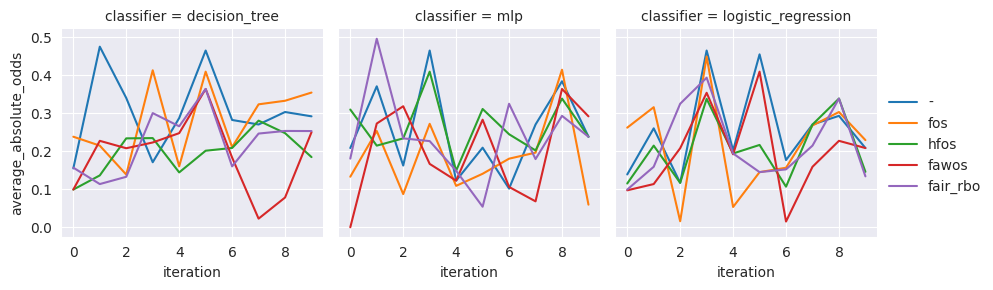

In [87]:
for dataset_name, dfs in zip(dataset_names, dfs_fairness):
    print(dataset_name)
    aggregate_runs_no_mean(dfs, y='average_absolute_odds')

heart_disease


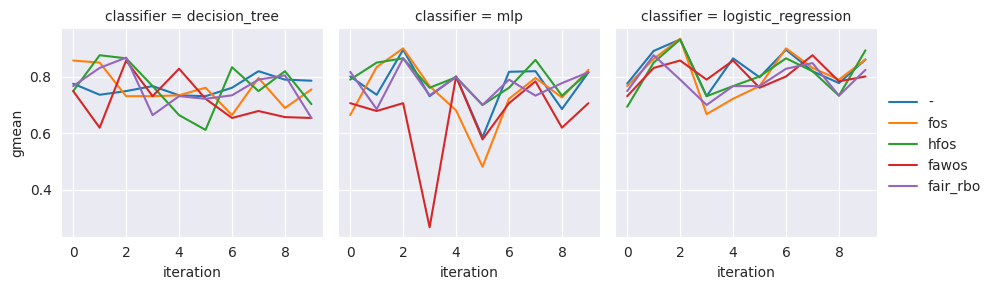

In [88]:
for dataset_name, dfs in zip(dataset_names, dfs_performance):
    print(dataset_name)
    aggregate_runs_no_mean(dfs, y='gmean')

# Cont 

In [ ]:
dfs_fairness = []
dfs_performance = []
dataset_names = ['adult', 'german', 'heart_disease']
classifier_names = ['decision_tree', 'mlp', 'logistic_regression', 'naive_bayes']
algorithm_names = ['fos', 'hfos']
folder_names = ['2023-04-26-cont', '2023-04-26-cont']

for dataset_name in dataset_names:
    df_data_fair = []
    df_data_perf = []
    for classifier_name in classifier_names:
        for folder_name, algorithm_name in zip(folder_names, algorithm_names):
            for i in range(0, 6):
                if os.path.exists(os.path.join('../results/results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'fairness_{i}.csv')):
                    fair_path = os.path.join('../results/results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'fairness_{i}.csv')
                    perf_path = os.path.join('../results/results', f'{algorithm_name}_{dataset_name}_{classifier_name}', folder_name, f'performance_{i}.csv')
                    df_fair = pd.read_csv(fair_path)
                    df_performance = pd.read_csv(perf_path)
                    df_fair['classifier'] = [classifier_name] * len(df_fair)
                    df_fair['algorithm'] = [algorithm_name if 'fair' in x else '-' for x in df_fair['data']]
                    df_fair['iteration'] = [i] * len(df_fair)
                    df_fair.drop(columns=['data', 'average_odds', 'average_absolute_odds'], inplace=True)
                    df_performance['classifier'] = [classifier_name] * len(df_performance)
                    df_performance['algorithm'] = [algorithm_name if 'fair' in x else '-' for x in df_performance['data']]
                    df_performance['iteration'] = [i] * len(df_performance)
                    df_performance.drop(columns=['data'], inplace=True)
                    df_data_fair.append(df_fair)
                    df_data_perf.append(df_performance)
    dfs_fairness.append(df_data_fair)
    dfs_performance.append(df_data_perf)

In [ ]:
for dataset_name, dfs in zip(dataset_names, dfs_fairness):
    df = aggregate_runs(dfs)
    print(dataset_name)
    display(df)
    print('----------------------------------------------------------------')

In [ ]:
for dataset_name, dfs in zip(dataset_names, dfs_performance):
    df = aggregate_runs(dfs)
    print(dataset_name)
    display(df)
    print('----------------------------------------------------------------')

# HFOS

In [ ]:
import pandas as pd

df_adult_fair = pd.read_csv('../results/hfos_adult_lr/fairness_only_cont_int_5.csv')
df_adult_perf = pd.read_csv("../results/hfos_adult_lr/performance_only_cont_int_5.csv")

df_german_fair = pd.read_csv('../results/hfos_german_lr/fairness_only_cont_int_5.csv')
df_german_perf = pd.read_csv("../results/hfos_german_lr/performance_only_cont_int_5.csv")

df_bank_fair = pd.read_csv('../results/hfos_bank_lr/fairness_only_cont_int_5.csv')
df_bank_perf = pd.read_csv("../results/hfos_bank_lr/performance_only_cont_int_5.csv")

In [ ]:
perf_train, perf_fair = calculate_mean_std(['adult', 'german', 'bank'], [df_adult_perf, df_german_perf, df_bank_perf])

In [ ]:
perf_train

In [ ]:
perf_fair

In [ ]:
fair_train, fair_fair = calculate_mean_std(['adult', 'german', 'bank'], [df_adult_fair, df_german_fair, df_bank_fair])

In [ ]:
fair_train

In [ ]:
fair_fair

# FAWOS

In [ ]:
df_german_fair = pd.read_csv('../results/fawos_german_lr/fairness_5.csv')
df_german_perf = pd.read_csv("../results/fawos_german_lr/performance_5.csv")

In [ ]:
perf_train, perf_fair = calculate_mean_std(['german'], [df_bank_perf])

In [ ]:
perf_train

In [ ]:
perf_fair

In [ ]:
fair_train, fair_fair = calculate_mean_std(['german'], [df_german_fair])

In [ ]:
fair_train

In [ ]:
fair_fair

# FOS

# FAWOS hyperparameters

In [ ]:
def calculate_mean_std_tuning(df):
    fair = []
    
    unique_values = df['weight'].unique().tolist()
    for v in unique_values:
        df_small = df[df['weight'] == v].drop(columns=['weight'])
        df_small_mean = df_small.mean()
        df_small_median = df_small.median()
        df_small_std = df_small.std()
        df_small_mean['dataset'] = v
        df_small_median['dataset'] = v
        df_small_std['dataset'] = v
        df_small_mean['type'] = 'mean'
        df_small_median['type'] = 'median'
        df_small_std['type'] = 'std'
        fair.append(df_small_mean.to_frame().T)
        fair.append(df_small_median.to_frame().T)
        fair.append(df_small_std.to_frame().T)
    
    fair = pd.concat(fair).reset_index(drop=True)
    return fair

In [ ]:
df_fairness = pd.read_csv('../results/FAWOS_finetune/fairness.csv').drop(columns=['Unnamed: 0'])
df_performance = pd.read_csv('../results/FAWOS_finetune/performance.csv').drop(columns=['Unnamed: 0'])

In [ ]:
fair_aggr = calculate_mean_std_tuning(df_fairness)
perf_aggr = calculate_mean_std_tuning(df_performance)

In [ ]:
fair_aggr

In [ ]:
perf_aggr